###### Concepts:
1. PCA
2. Logistic Regression


In [45]:
#import Paads and numpy
import pandas as pd
import numpy as np 

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt

In [2]:
dbObj=pd.read_csv("Leads.csv")

In [3]:
dbObj.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [4]:
#shape
dbObj.shape

(9240, 37)

In [5]:
#lets remove the rows with null values on 'Lead Source', 'TotalVisits', 'Page Views Per Visit'                                   
dbObj.dropna(axis=0, subset=['Lead Source','TotalVisits','Page Views Per Visit'],inplace=True)
dbObj.shape

(9074, 37)

In [6]:
dbObj.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2296
Specialization                                   1431
How did you hear about X Education               2200
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# let remove country as it is not required 
dbObj.drop(['Country'],inplace=True,axis=1)
dbObj.shape

(9074, 36)

In [8]:
dbObj.shape

(9074, 36)

In [9]:
dbObj['Lead Profile'].value_counts()

Select                         4055
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [10]:
dbObj['Specialization'].value_counts()

Select                               1851
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [11]:
#check where both specilaization and profession  are null
dbObjremoveRows1=dbObj[dbObj['What is your current occupation'].isnull() & dbObj['Specialization'].isnull() ]

In [12]:
dbObjremoveRows1.index

Int64Index([   5,    7,   16,   33,   47,   49,   53,   54,   63,   83,
            ...
            9136, 9137, 9154, 9159, 9165, 9173, 9187, 9207, 9208, 9214],
           dtype='int64', length=1413)

In [13]:
dbObj.drop(index=dbObjremoveRows1.index, axis=0, inplace=True)

In [14]:
dbObj.dropna(subset=['How did you hear about X Education'],axis=0,inplace=True)

In [15]:
dbObj.shape

(6871, 36)

In [16]:
dbObj.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                   499
What matters most to you in choosing a course     499
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [17]:
#find the percent of null values 
round(100*(dbObj.isnull().sum()/len(dbObj.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                    0.00
How did you hear about X Education                0.00
What is your current occupation                   7.26
What matters most to you in choosing a course     7.26
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [18]:
#lets delete all the value wich is more than 30% of null value 
dbObj.drop(['Lead Quality','Lead Profile','What matters most to you in choosing a course','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags',],axis=1,inplace=True)

In [19]:
dbObj.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                   0
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                   0
Total Time Spent on Website                   0
Page Views Per Visit                          0
Last Activity                                 0
Specialization                                0
How did you hear about X Education            0
What is your current occupation             499
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                 

In [20]:
dbObj['What is your current occupation'].value_counts()

Unemployed              5475
Working Professional     673
Student                  193
Other                     15
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [21]:
#lets remove the row with current occupation null 
dbObj.dropna(subset=['What is your current occupation'],axis=0,inplace=True)
dbObj.shape

(6372, 28)

In [22]:
dbObj.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
How did you hear about X Education          0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Cou

In [23]:
#let replace the value of select from specialisation with the random distribution of existing values refering the top 4 unemployed occupation select occupation
#there are two way to deal with it (1)- create dummy variables and delete select or repalce it with some assumed variable
#lets go with the 
top5_Unmployed_Specialization=dbObj[(dbObj['What is your current occupation']=='Unemployed') & ( dbObj['Specialization']!='Select')].Specialization.value_counts(normalize=True)
top5_Unmployed_Specialization

Finance Management                   0.164035
Human Resource Management            0.147177
Marketing Management                 0.141825
Operations Management                0.082419
Business Administration              0.067969
IT Projects Management               0.063152
Supply Chain Management              0.060476
Banking, Investment And Insurance    0.058871
Media and Advertising                0.036928
Travel and Tourism                   0.035322
International Business               0.033182
Healthcare Management                0.023816
E-COMMERCE                           0.018999
Hospitality Management               0.018196
Retail Management                    0.018196
Rural and Agribusiness               0.012845
E-Business                           0.010704
Services Excellence                  0.005887
Name: Specialization, dtype: float64

In [24]:
dbObj.loc[dbObj.Specialization =='Select','Specialization']=np.random.choice(top5_Unmployed_Specialization.index, size=len(dbObj[dbObj['Specialization']=='Select'].Specialization),p=top5_Unmployed_Specialization.values)

In [25]:
dbObj['Specialization'].value_counts()

Finance Management                   1039
Marketing Management                  933
Human Resource Management             932
Operations Management                 530
Business Administration               446
IT Projects Management                420
Supply Chain Management               377
Banking, Investment And Insurance     370
Media and Advertising                 221
Travel and Tourism                    213
International Business                198
Healthcare Management                 157
Hospitality Management                121
E-COMMERCE                            119
Retail Management                     114
Rural and Agribusiness                 80
E-Business                             64
Services Excellence                    38
Name: Specialization, dtype: int64

In [26]:
dbObj.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
How did you hear about X Education          0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Cou

#### There is no null value now lets start with preparing the data 
###### 1. lets create the dummy variables
###### 2. Then dimension reduction and find the varaibles with high variance using pca

In [27]:
dbObj.shape

(6372, 28)

In [28]:
catagoricalCols = dbObj.select_dtypes(include=object)
catagoricalCols.columns


Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [29]:
dummy_Variables=pd.get_dummies(dbObj[['Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)


In [30]:
numericCols =  dbObj.select_dtypes(include=np.number)
numericCols.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [31]:
dbObj=pd.concat([dbObj[numericCols.columns],dummy_Variables], axis=1)

In [32]:
dbObj.shape

(6372, 96)

In [34]:
dbObj.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes', 'Do Not Call_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity

#### Model Building 

In [37]:
#Spliting of data into training modeling 
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = dbObj.drop(['Lead Number', 'Converted'],axis=1)

# Putting response variable to y
y = dbObj['Converted']


In [40]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

###### Applying PCA on the data

In [38]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [41]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [42]:
pca.components_

array([[ 1.79413048e-03,  9.99997540e-01,  1.18595163e-03, ...,
         1.42181852e-06,  7.46683612e-07, -3.14017205e-07],
       [ 9.82689449e-01, -1.99692387e-03,  1.79375478e-01, ...,
         6.61249771e-06,  1.23927079e-04,  4.24338843e-05],
       [ 1.84148510e-01,  9.08212143e-04, -9.64411522e-01, ...,
        -8.25186805e-04, -1.94480307e-03,  1.42859542e-05],
       ...,
       [ 0.00000000e+00,  3.58906380e-23, -6.30294822e-19, ...,
         1.41948040e-14,  1.41860241e-14,  1.42479867e-14],
       [-0.00000000e+00,  1.10545062e-21, -3.84228827e-19, ...,
        -1.06451380e-14, -1.05906101e-14, -1.03550222e-14],
       [ 0.00000000e+00, -9.25723068e-19, -2.75219038e-17, ...,
         2.94882368e-01,  2.94882368e-01,  2.94882368e-01]])

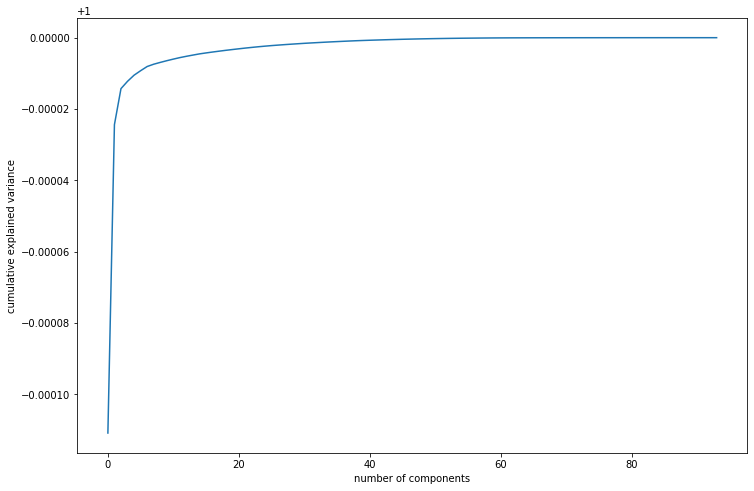

In [46]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [49]:
#lets chosse 15 components for our model
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=15)

In [50]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(4460, 15)

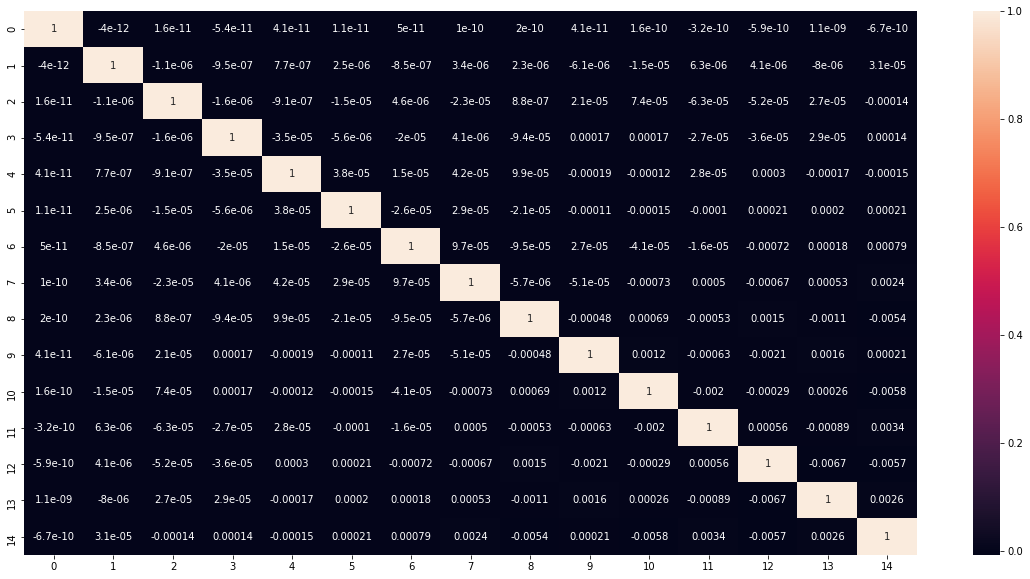

In [55]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())
#plotting the correlation matrix
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [51]:
#for test data 
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(1912, 15)

Applying Logistic regression 

In [56]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.85'